# Build 5 CSV files:
## census tracts used (i.e., with businesses in the city of SD in them)
## labels (i.e., median number of days businesses have been open in each tract)
## scaled labels (i.e., "score" from 1 to 100)
## features for each census tract
## scaled features (using median and stddev of each feature)

In [21]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing

%matplotlib inline

In [22]:
# define extra bit for filenames, in case of only using one NAICS code
extras = ['all','44','45','56','62']
i = 0
extra = '_'+extras[i]

## Labels

In [23]:
# read in labels (i.e., business info)
bus_all = pd.read_csv('data_final/sd_active_businesses_cleaned.csv')
print len(bus_all)
# use only businesses with a given simple NAICS code
if extras[i]!='all':
    bus = bus_all.loc[bus_all.naics_code_simple==int(extras[i])]
else:
    bus = bus_all
#bus.loc[bus.census_tract==18802]
#bus.loc[bus.census_tract==17403]
print len(bus)

56710
56710


In [24]:
# get median days since creation for each tract
tracts_age = bus.groupby('census_tract').median().days_since_creation
tracts = tracts_age.index
median_days_open = tracts_age.values
# save number of census tracts with businesses (i.e., examples)
n_examples = len(median_days_open)
print n_examples

314


In [25]:
# save total # of businesses in each tract
n_bus_all = bus_all.groupby('census_tract').count().account_key
# save # of businesses in each tract of given simple NAICS code
n_bus = bus.groupby('census_tract').count().account_key

In [26]:
# write unscaled labels (median days businesses have been open in each tract) to csv
np.savetxt('data_final/labels'+extra+'.csv', median_days_open, fmt='%.1f')
# write list of census tracts used to csv
np.savetxt('data_final/tracts_used'+extra+'.csv', tracts, fmt='%i')

7.77073990053
8.19452054795
2.51032964193


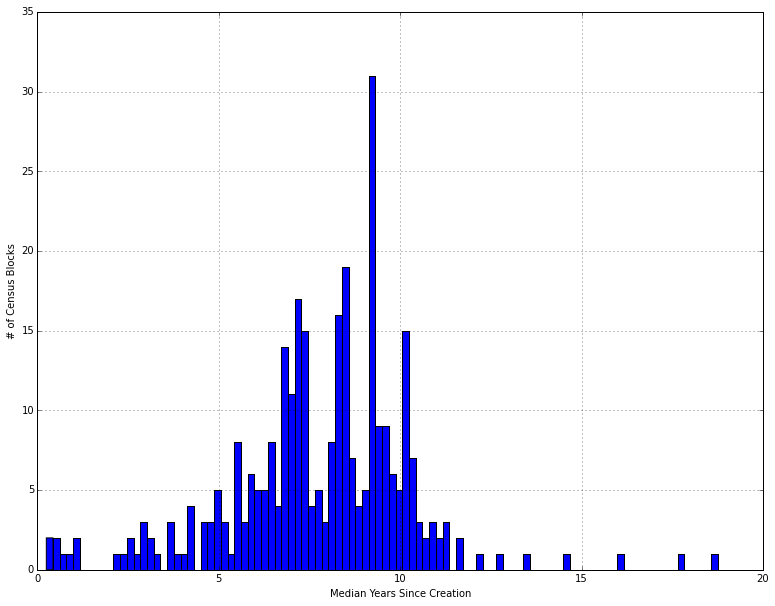

In [27]:
# plot histogram of median days since creation
plt.figure(figsize=(13, 10))
(tracts_age/365).hist(bins=100)
plt.xlabel('Median Years Since Creation')
plt.ylabel('# of Census Blocks')
print np.mean(tracts_age/365)
print np.median(tracts_age/365)
print np.std(tracts_age/365)

40.652856817
42.9416987274
13.5583059974


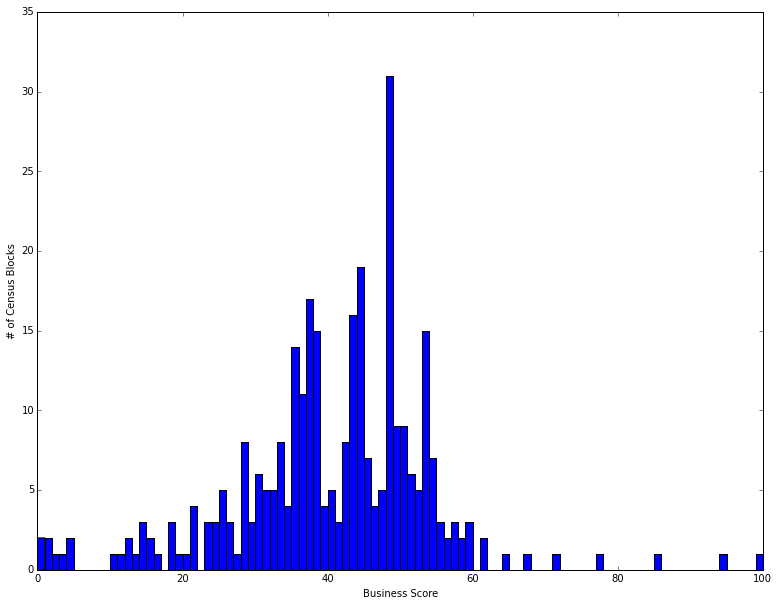

In [28]:
# feature scale min,max to 1,100
score = 100*((median_days_open - np.min(median_days_open)) / \
             (np.max(median_days_open) - np.min(median_days_open)))
# plot new histogram
plt.figure(figsize=(13, 10))
plt.hist(score,bins=100)
plt.xlabel('Business Score')
plt.ylabel('# of Census Blocks')
print np.mean(score)
print np.median(score)
print np.std(score)

In [29]:
# write scaled labels (i.e., scores) from 1 to 100
np.savetxt('data_final/labels_scaled'+extra+'.csv', score, fmt='%.1f')

## Features

In [30]:
# read in features
popl = pd.read_csv('data_final/sd_population_cleaned.csv')
fin = pd.read_csv('data_final/sd_housing_employment_income_cleaned.csv')
parking_meters = pd.read_csv('data_final/sd_parking_meters_cleaned.csv')

# choose which features to use (per census tract)
    # population (population)
    # population_percent_male
    # population_percent_female
    # age_med (median age)
    # age_med_male (median male age)
    # age_med_female (median female age)
    # minor_percent (percenage under 18)
    # adult_percent (percentage over 18)
    # homes (number of homes)
    # homes_percent_mortgage (percentage of homes owne w/ mortgage)
    # homes_percent_clear (percentage of homes owned free & clear)
    # homes_percent_rent (percentage of homes rented)
    # employment_percent (employment percentage)
    # income_med (median income)
    # income_med_owner (median income for owned homes)
    # income_med_renter (median income for rented homes)
    # cost_med (median housing cost)
    # cost_med_owner (median cost for owned homes)
    # cost_med_renter (median cost for rented homes)
    # total_amount (parking meters)
    # n_business (total number of businesses)
    # n_business_code (totals number of businesses with same simple NAICS code)
n_features = 22

In [31]:
# intialize features matrix (number of businesses by number of features)
features = np.zeros((n_examples,n_features))
# go through each business
for i in range(0,n_examples):
    
    # keep track of which feature we're saving
    feature_num = 0

    # get features from population info
    spot = popl.loc[popl.census_tract==tracts[i]]
    # make sure we got 1 and only 1 matching row
    if len(spot) == 1:
        # total population
        features[i,feature_num] = spot.population.to_string(index=False)
        feature_num += 1
        # percent pop male
        features[i,feature_num] = spot.population_percent_male.to_string(index=False)
        feature_num += 1
        # percent pop female
        features[i,feature_num] = spot.population_percent_female.to_string(index=False)
        feature_num += 1
        # median age
        features[i,feature_num] = spot.age_med.to_string(index=False)
        feature_num += 1
        # median age male
        features[i,feature_num] = spot.age_med_male.to_string(index=False)
        feature_num += 1
        # median age male
        features[i,feature_num] = spot.age_med_male.to_string(index=False)
        feature_num += 1
        # percentage under 18
        features[i,feature_num] = spot.minor_percent.to_string(index=False)
        feature_num += 1
        # percentage over 18
        features[i,feature_num] = spot.adult_percent.to_string(index=False)
        feature_num += 1
    else:
        print("***PROBLEM getting population info for census tract %s" % str(tract))
        # account for all features missed above
        feature_num += 8

    # get features from housing, employment, income info
    spot = fin.loc[fin.census_tract==tracts[i]]
    # make sure we got 1 and only 1 matching row
    if len(spot) == 1:
        # total number of housing units
        features[i,feature_num] = spot.homes.to_string(index=False)
        feature_num += 1
        # percentage of housing units owned w/ mortgage
        features[i,feature_num] = spot.homes_percent_mortgage.to_string(index=False)
        feature_num += 1
        # percentage of housing units owned free & clear
        features[i,feature_num] = spot.homes_percent_clear.to_string(index=False)
        feature_num += 1
        # percentage of housing units rented
        features[i,feature_num] = spot.homes_percent_rent.to_string(index=False)
        feature_num += 1
        # percent population in labor force
        features[i,feature_num] = spot.employment_percent.to_string(index=False)
        feature_num += 1
        # median annual household income
        features[i,feature_num] = spot.income_med.to_string(index=False)
        feature_num += 1
        # median annual household income for owned houses
        features[i,feature_num] = spot.income_med_owner.to_string(index=False)
        feature_num += 1
        # median annual household income for rented houses
        features[i,feature_num] = spot.income_med_renter.to_string(index=False)
        feature_num += 1
        # median monthly housing cost
        features[i,feature_num] = spot.cost_med.to_string(index=False)
        feature_num += 1
        # median monthly housing cost for owned homes
        features[i,feature_num] = spot.cost_med_owner.to_string(index=False)
        feature_num += 1
        # median monthly housing cost for rented homes
        features[i,feature_num] = spot.cost_med_renter.to_string(index=False)
        feature_num += 1
    else:
        print("***PROBLEM getting financial info for census tract %s" % str(tract))        
        # account for all features missed above
        feature_num += 11

    # get features from parking meter info
    spot = parking_meters.loc[parking_meters.census_tract==tracts[i]]
    # make sure we got 1 and only 1 matching row
    if len(spot) == 1:
        # total amount spent on parking meters
        features[i,feature_num] = spot.total_amount.to_string(index=False)
        feature_num += 1
    else:
        #print("***PROBLEM getting parking meter info for census tract %s" % str(tract))        
        # total amount spent on parking meters
        feature_num += 1

    # total number of businesses in census tract
    features[i,feature_num] = n_bus_all[n_bus_all.index==tracts[i]].values[0]
    feature_num += 1

    # number of businesses with same simple NAICS code in census tract
    features[i,feature_num] = n_bus[n_bus.index==tracts[i]].values[0]
    feature_num += 1

print features.shape
features[:5]

(314, 22)


array([[  3.02900000e+03,   5.01155000e-01,   4.98845000e-01,
          5.03000000e+01,   4.98000000e+01,   4.98000000e+01,
          1.81248000e-01,   8.18752000e-01,   1.39700000e+03,
          5.89000000e+01,   2.31000000e+01,   1.80000000e+01,
          5.46000000e+01,   1.06406000e+05,   1.15066000e+05,
          2.78130000e+04,   1.89500000e+03,   1.92300000e+03,
          1.83900000e+03,   0.00000000e+00,   1.33000000e+02,
          1.33000000e+02],
       [  1.80100000e+03,   4.69184000e-01,   5.30816000e-01,
          4.65000000e+01,   4.55000000e+01,   4.55000000e+01,
          1.31038000e-01,   8.68962000e-01,   1.04700000e+03,
          3.41000000e+01,   1.11000000e+01,   5.48000000e+01,
          6.92000000e+01,   9.79760000e+04,   1.57500000e+05,
          4.28910000e+04,   1.33800000e+03,   2.24300000e+03,
          9.74000000e+02,   4.16177300e+06,   1.82000000e+02,
          1.82000000e+02],
       [  4.20800000e+03,   5.06416000e-01,   4.93584000e-01,
          3.9600

In [32]:
# write features to csv
np.savetxt('data_final/features'+extra+'.csv', features, fmt='%.3f', delimiter=',')

In [33]:
# feature scale to median and stddev
features_scaled = (features-np.mean(features,axis=0))/np.std(features,axis=0)
print np.mean(features,axis=0)
print np.std(features,axis=0)
print features_scaled.shape
features_scaled[:5]

[  4.74004777e+03   5.06185331e-01   4.93814666e-01   3.58665605e+01
   3.50350318e+01   3.50350318e+01   2.12788567e-01   7.84026720e-01
   1.85514331e+03   3.91245223e+01   1.12127389e+01   4.93442675e+01
   6.68824841e+01   7.01499650e+04   8.88942930e+04   5.49919618e+04
   1.62904459e+03   1.84957325e+03   1.45209873e+03   2.39104931e+06
   1.80605096e+02   1.80605096e+02]
[  2.04408124e+03   5.47350108e-02   5.47350101e-02   8.04870898e+00
   7.95824987e+00   7.95824987e+00   9.40958966e-02   1.03311507e-01
   8.70537817e+02   2.06304071e+01   9.47462065e+00   2.51950717e+01
   9.54016212e+00   3.30137651e+04   3.57995768e+04   2.76355459e+04
   5.94292207e+02   7.07569471e+02   4.10230469e+02   1.48180359e+07
   2.95081523e+02   2.95081523e+02]
(314, 22)


array([[ -8.37074250e-01,  -9.19033566e-02,   9.19034158e-02,
          1.79326145e+00,   1.85530341e+00,   1.85530341e+00,
         -3.35195986e-01,   3.36122095e-01,  -5.26276174e-01,
          9.58559741e-01,   1.25464244e+00,  -1.24406344e+00,
         -1.28745025e+00,   1.09820964e+00,   7.31061911e-01,
         -9.83478374e-01,   4.47516240e-01,   1.03773205e-01,
          9.43131490e-01,  -1.61360745e-01,  -1.61328622e-01,
         -1.61328622e-01],
       [ -1.43783315e+00,  -6.76008476e-01,   6.76008542e-01,
          1.32113604e+00,   1.31498361e+00,   1.31498361e+00,
         -8.68800551e-01,   8.22127974e-01,  -9.28326485e-01,
         -2.43549352e-01,  -1.18990361e-02,   2.16539669e-01,
          2.42922069e-01,   8.42861605e-01,   1.91638319e+00,
         -4.37876705e-01,  -4.89733136e-01,   5.56025617e-01,
         -1.16543934e+00,   1.19497868e-01,   4.72718334e-03,
          4.72718334e-03],
       [ -2.60286999e-01,   4.21428235e-03,  -4.21422421e-03,
          4.6385

In [34]:
# write scaled features to csv
np.savetxt('data_final/features_scaled'+extra+'.csv', features_scaled, fmt='%.5f', delimiter=',')
# write means and standard deviations to csv
np.savetxt('data_final/means_stddevs'+extra+'.csv', [np.mean(features,axis=0), np.std(features,axis=0)], \
           fmt='%.3f', delimiter=',')